## 处理数据

本节使用猫狗分类数据集，原始数据集地址：https://www.kaggle.com/c/dogs-vs-cats/data

包含25000张原始猫狗图像（猫狗各12500）。

下面，要创建3个子集，每个类别各1000个样本的训练集、500个样本的验证集和500个样本的测试集。

### 将图像复制到训练、验证和测试的目录

In [1]:
import os, shutil

In [2]:
os.getcwd()

'/home/cqc/文档/git/DeepLearning_with_Keras'

In [3]:
#原始数据集解压目录的路径
original_dataset_dir = '/home/cqc/文档/git/DeepLearning_with_Keras/datasets/dogs-vs-cats/train'

#保存较小数据集的目录
base_dir = '/home/cqc/文档/git/DeepLearning_with_Keras/datasets/dogs-vs-cats-small'
os.mkdir(base_dir)

#分别对应划分后的训练、验证和测试的目录
train_dir = os.path.join(base_dir, 'train')
os.mkdir(train_dir)
validation_dir = os.path.join(base_dir, 'validation')
os.mkdir(validation_dir)
test_dir = os.path.join(base_dir, 'test')
os.mkdir(test_dir)

#猫的训练图像目录
train_cats_dir = os.path.join(train_dir, 'cats')
os.mkdir(train_cats_dir)
#狗的训练图像目录
train_dogs_dir = os.path.join(train_dir, 'dogs')
os.mkdir(train_dogs_dir)

#猫的验证图像目录
validation_cats_dir = os.path.join(validation_dir, 'cats')
os.mkdir(validation_cats_dir)
#狗的验证图像目录
validation_dogs_dir = os.path.join(validation_dir, 'dogs')
os.mkdir(validation_dogs_dir)

#猫的测试图像目录
test_cats_dir = os.path.join(test_dir, 'cats')
os.mkdir(test_cats_dir)
#狗的测试图像目录
test_dogs_dir = os.path.join(test_dir, 'dogs')
os.mkdir(test_dogs_dir)

#将前1000张猫的图像复制到train_cats_dir
fnames = ['cat.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_cats_dir, fname)
    shutil.copyfile(src, dst)
    
#将接下来500张猫的图像复制到validation_cats_dir
fnames = ['cat.{}.jpg'.format(i) for i in range(1000,1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_cats_dir, fname)
    shutil.copyfile(src, dst)
    
#将接下来500张猫的图像复制到test_cats_dir
fnames = ['cat.{}.jpg'.format(i) for i in range(1500,2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_cats_dir, fname)
    shutil.copyfile(src, dst)
    
#将前1000张狗的图像复制到train_dogs_dir
fnames = ['dog.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_dogs_dir, fname)
    shutil.copyfile(src, dst)
    
#将接下来500张狗的图像复制到validation_dogs_dir
fnames = ['dog.{}.jpg'.format(i) for i in range(1000,1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_dogs_dir, fname)
    shutil.copyfile(src, dst)
    
#将接下来500张狗的图像复制到test_dogs_dir
fnames = ['dog.{}.jpg'.format(i) for i in range(1500,2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_dogs_dir, fname)
    shutil.copyfile(src, dst)

查看每个分组（训练 / 验证 / 测试）中分别包含多少张图像。

In [4]:
print('total training cat images:', len(os.listdir(train_cats_dir)))
print('total training dog images:', len(os.listdir(train_dogs_dir)))
print('total validation cat images:', len(os.listdir(validation_cats_dir)))
print('total validation dog images:', len(os.listdir(validation_dogs_dir)))
print('total test cat images:', len(os.listdir(test_cats_dir)))
print('total test dog images:', len(os.listdir(test_dogs_dir)))

total training cat images: 1000
total training dog images: 1000
total validation cat images: 500
total validation dog images: 500
total test cat images: 500
total test dog images: 500


## 构建网络

要尽量使连接的 Flatten 层的尺寸不要太大，尝试增加 Conv2D+MaxPooling2D 的层数。

本例初始输入的尺寸为 150 * 150 ，最后的 Flatten 层之前的特征图大小为 7 * 7 。

![cnn](img/cnn.png)

面对的是一个二元分类，使用 sigmond 激活单一单元。

In [5]:
from keras import layers
from keras import models

Using TensorFlow backend.


In [6]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

Instructions for updating:
Colocations handled automatically by placer.


查看模型各层情况：

In [7]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 15, 15, 128)       147584    
__________

在编译这一步，使用 RMSprop 优化器，因为最后一层是 sigmoid 单元，所以使用二元交叉熵作为损失函数。

### 配置模型用于训练

In [8]:
from keras import optimizers

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

## 数据预处理

将数据输入神经网络之前，应该将数据格式化为经过预处理的浮点数张量。预处理大致步骤如下：

(1)读取图像文件

(2)将JPEG文件解码为RGB像素网格。

(3)将这些像素网格转换为浮点数张量。

(4)将像素值（0～255范围内）缩放到 [0,1] 区间。

使用 Keras 自带的 ImageDataGenerator 类可以快速创建 Python 生成器，能够将硬盘上的图像文件自动转换为预处理好的张量批量。

### 使用 ImageDataGenerator 从目录中读取图像

In [9]:
from keras.preprocessing.image import ImageDataGenerator

In [10]:
#将所有图像乘以 1/255 缩放
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),#将图像调整为 150*150
    batch_size=20,
    class_mode='binary'#因为使用了二元交叉熵损失，所以需要用二进制标签
)

validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),#将图像调整为 150*150
    batch_size=20,
    class_mode='binary'#因为使用了二元交叉熵损失，所以需要用二进制标签
)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


注意，生成器会不停地生成这些批量，它会不断循环目标文件夹中的图像。因此，需要在某个时刻终止迭代循环。

In [11]:
for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    print('label batch shape:', labels_batch.shape)
    break

data batch shape: (20, 150, 150, 3)
label batch shape: (20,)


可见，一个生成器生成了 150 * 150 的RGB图像，形状为 (20, 150, 150, 3)，每个批量包含20个样本（批量大小 batch_size）。

还有一个二进制标签，形状为 (20,) 。

### 利用批量生成器拟合模型

使用 fit_generator 方法来利用生成器拟合数据。

它的第一个参数是 Python 生成器，生成输入和目标组成的批量。

因为数据是不断产生的，所以 Keras 要知道每一轮从生成器抽取多少样本。step_per_epoch 参数决定模型从生成器中抽取 step_per_epoch 个批量后，拟合过程将进入下一个轮次。本例中，每个批量有20个样本，所以读取完所有2000个样本需要100个批量。

使用 fit_generator 时，还可以传入 validation_data 参数，其作用与 fit 方法中相似，这个参数可以是一个数据生成器，也可以是一个 Numpy 数组组成的原组。如果向 validation_data 传入的是生成器，还需要指定 validation_steps 参数，说明需要从验证生成器中抽取多少个批次用于评估。

In [12]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch=100,
    epochs=20,
    validation_data=validation_generator,
    validation_steps=50
)

Instructions for updating:
Use tf.cast instead.
Epoch 1/20
100/100 [==============================] - 36s 362ms/step - loss: 0.6921 - acc: 0.5175 - val_loss: 0.7201 - val_acc: 0.5000
Epoch 2/20
100/100 [==============================] - 34s 345ms/step - loss: 0.6717 - acc: 0.5960 - val_loss: 0.6517 - val_acc: 0.6470
Epoch 3/20
100/100 [==============================] - 34s 343ms/step - loss: 0.6318 - acc: 0.6495 - val_loss: 0.6296 - val_acc: 0.6520
Epoch 4/20
100/100 [==============================] - 34s 343ms/step - loss: 0.5743 - acc: 0.6980 - val_loss: 0.6567 - val_acc: 0.6160
Epoch 5/20
100/100 [==============================] - 34s 343ms/step - loss: 0.5439 - acc: 0.7225 - val_loss: 0.5933 - val_acc: 0.6680
Epoch 6/20
100/100 [==============================] - 34s 343ms/step - loss: 0.5096 - acc: 0.7560 - val_loss: 0.6894 - val_acc: 0.6170
Epoch 7/20
100/100 [==============================] - 34s 343ms/step - loss: 0.4810 - acc: 0.7630 - val_loss: 0.5675 - val_acc: 0.6930
Epoch 8

### 保存模型

In [13]:
model.save('models/cats_and_dogs_small_1.h5')

### 绘制训练过程中的损失曲线和精度曲线

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline

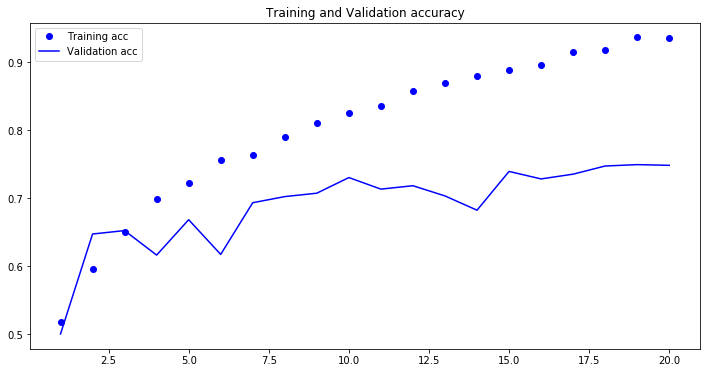

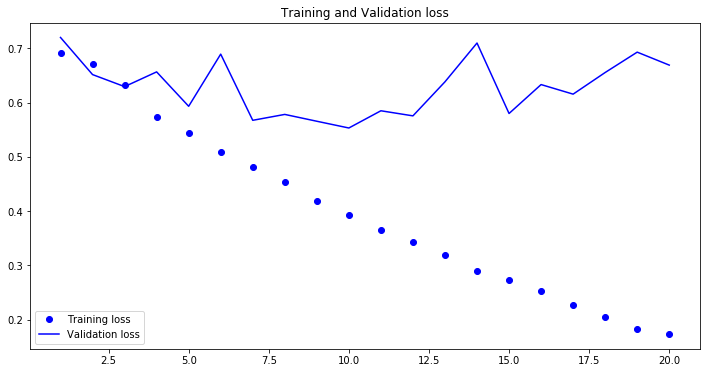

In [15]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.figure(figsize=(12, 6))
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and Validation accuracy')
plt.legend()

plt.figure(figsize=(12, 6))
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and Validation loss')
plt.legend()

plt.show()

验证集在10轮左右，精确度就达到最高；在10轮左右损失最小。

因为训练样本较小，因此要多关心过拟合问题，可以使用 dropout 和权重衰减（L2正则化）降低过拟合程度。

在计算机视觉深度学习领域，常常使用数据增强来处理过拟合。

## 使用数据增强

过拟合的原因是学习样本太少，导致无法训练出泛化到新数据的模型。

数据增强是从现有训练样本中生成更多的训练数据，其方法是利用多种能够生成可信图像的随机变换来增加样本。

其目标是，模型在训练时不会两次查看完全一样的图像，让模型观察到数据的更多内容，具有更好的泛化能力。

在Keras中，可以通过对 ImageDataGenerator 实例读取的图像执行多次随机变换来实现。

### 利用 ImageDataGenerator 来设置数据增强

In [16]:
datagen = ImageDataGenerator(
    rotation_range=40,#随机旋转的角度值范围0～180
    width_shift_range=0.2,
    height_shift_range=0.2,#图像在水平和垂直方向上随机平移的范围（相对于总宽度和总高度的比例）
    shear_range=0.2,#随机错切变换的角度
    zoom_range=0.2,#随机缩放的范围
    horizontal_flip=True,#是否随机将图像水平反转
    fill_mode='nearest'#填充新创建像素的方法
)

### 显示几个随机增强后的训练图像

In [17]:
#图像预处理工具的模块
from keras.preprocessing import image

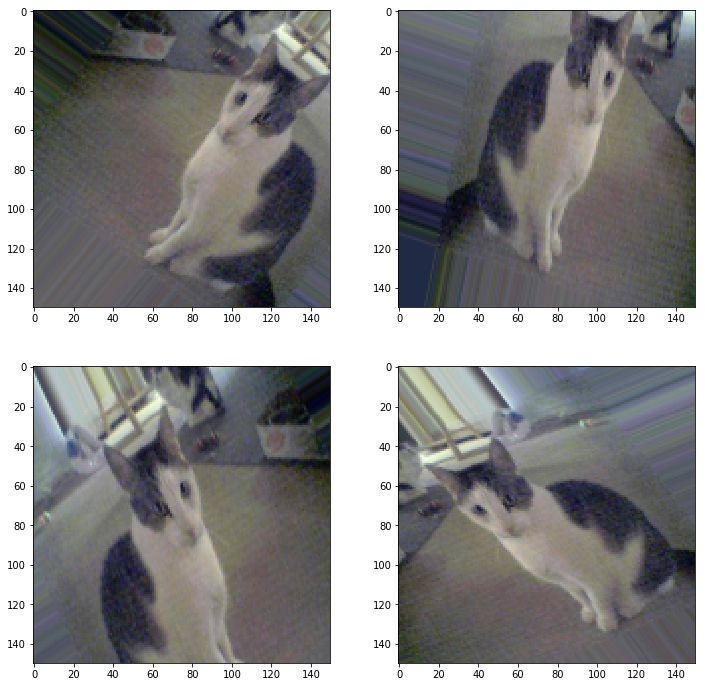

In [18]:
fnames = [os.path.join(train_cats_dir, fname) for fname in os.listdir(train_cats_dir)]

#选择一张图像
img_path = fnames[3]
#读取图像并调整大小
img = image.load_img(img_path, target_size=(150, 150))
#将其转换为(150,150,3)的Numpy数组
x = image.img_to_array(img)
#将其改变为(1,150,150,3)
x = x.reshape((1,) + x.shape)

#生成随机变换后的图像批量。
#循环生成是无限的，所以要在某个时刻终止
i = 0

plt.figure(figsize = [12, 12])
for batch in datagen.flow(x, batch_size=1):
    plt.subplot(2, 2, i + 1)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i+=1
    if i % 4 == 0:
        break
        
plt.show()

如果使用这种数据增强来训练一个网络，无法生成新信息，但能够混合现有信息，使网络看到的输入高度相关。

这种方法无法完全消除过拟合，为了进一步降低过拟合程度，还需要向模型添加一个 Dropout。

### 定义一个包含 Dropout 的新卷积神经网络

In [19]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))#添加dropout
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


### 利用数据增强生成器训练卷积神经网络

In [21]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,#随机旋转的角度值范围0～180
    width_shift_range=0.2,
    height_shift_range=0.2,#图像在水平和垂直方向上随机平移的范围（相对于总宽度和总高度的比例）
    shear_range=0.2,#随机错切变换的角度
    zoom_range=0.2,#随机缩放的范围
    horizontal_flip=True,#是否随机将图像水平反转
)

#不能增强验证数据
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)

validation_generator = test_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)

history = model.fit_generator(
    train_generator,
    steps_per_epoch=100,
    epochs=100,
    validation_data=validation_generator,
    validation_steps=50
)

Found 2000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.
Epoch 1/100
100/100 [==============================] - 65s 650ms/step - loss: 0.6930 - acc: 0.5228 - val_loss: 0.6778 - val_acc: 0.5687
Epoch 2/100
100/100 [==============================] - 63s 634ms/step - loss: 0.6802 - acc: 0.5538 - val_loss: 0.6635 - val_acc: 0.5663
Epoch 3/100
100/100 [==============================] - 65s 646ms/step - loss: 0.6625 - acc: 0.5912 - val_loss: 0.6258 - val_acc: 0.6559
Epoch 4/100
100/100 [==============================] - 66s 658ms/step - loss: 0.6393 - acc: 0.6294 - val_loss: 0.5917 - val_acc: 0.7039
Epoch 5/100
100/100 [==============================] - 66s 656ms/step - loss: 0.6278 - acc: 0.6472 - val_loss: 0.5830 - val_acc: 0.6994
Epoch 6/100
100/100 [==============================] - 65s 645ms/step - loss: 0.6169 - acc: 0.6575 - val_loss: 0.5620 - val_acc: 0.7273
Epoch 7/100
100/100 [==============================] - 63s 630ms/step - loss: 0.5994 - acc: 0.6725 -

100/100 [==============================] - 62s 624ms/step - loss: 0.4166 - acc: 0.8106 - val_loss: 0.4021 - val_acc: 0.8125
Epoch 61/100
100/100 [==============================] - 63s 626ms/step - loss: 0.4025 - acc: 0.8138 - val_loss: 0.3455 - val_acc: 0.8321
Epoch 62/100
100/100 [==============================] - 62s 625ms/step - loss: 0.4025 - acc: 0.8159 - val_loss: 0.3224 - val_acc: 0.8611
Epoch 63/100
100/100 [==============================] - 62s 623ms/step - loss: 0.4003 - acc: 0.8184 - val_loss: 0.3042 - val_acc: 0.8649
Epoch 64/100
100/100 [==============================] - 63s 627ms/step - loss: 0.4020 - acc: 0.8187 - val_loss: 0.3387 - val_acc: 0.8525
Epoch 65/100
100/100 [==============================] - 62s 624ms/step - loss: 0.4093 - acc: 0.8147 - val_loss: 0.3527 - val_acc: 0.8573
Epoch 66/100
100/100 [==============================] - 63s 627ms/step - loss: 0.4021 - acc: 0.8191 - val_loss: 0.3135 - val_acc: 0.8693
Epoch 67/100
100/100 [==============================] 

### 保存模型

In [22]:
model.save('models/cats_and_dogs_small_2.h5')

再次绘制结果，可见使用了数据增强和 dropout 后，模型不再过拟合，训练曲线紧紧跟着验证曲线。

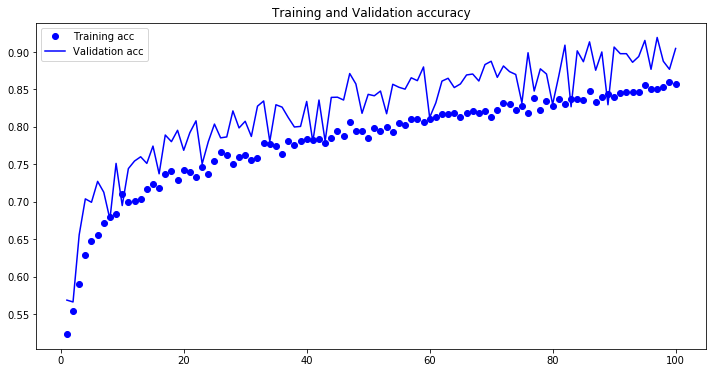

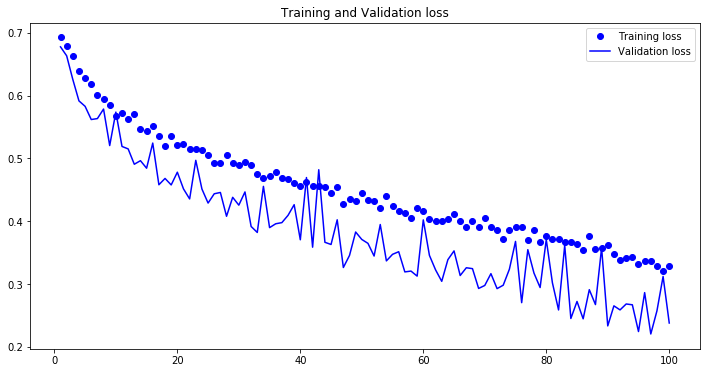

In [23]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.figure(figsize=(12, 6))
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and Validation accuracy')
plt.legend()

plt.figure(figsize=(12, 6))
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and Validation loss')
plt.legend()

plt.show()

通过进一步正则化以及调节网络参数，可以得到更高的精度。